<a href="https://colab.research.google.com/github/JaiminPatel23/DL/blob/main/LAB/J035_DL_LAB04_25_01_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Aim: Analyze deployed models**

Objectives:

Define seed.

Trainset: Extract only Cat vs dog images from CIFAR10

Dev set and Test set: ImageNet (cat and dog)

After the model is deployed as Flask app, collect data from user via flask app

Use collected data to retrain model - Create new versions of model

Analyze performance of these versions - accuracy, error

Steps :

1) Create trainset from CIFAR10 of only cats and dogs

2) Augment training  data  and again save it in respective folder only

3) Create dev and test - from imagenet of only cats and dogs

4) Build your modelon train set, save as h5

5) Evaluate on Development Set & Test Set

6) Build website 

7) Collect data (labels and images) from user

8) Analyse confusion matrix for 25 attempts

9) Decide the next strategy:  retrain with new data? Or not retrain?


In [ ]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np

Trainset: Extract only Cat vs dog images from CIFAR10

In [ ]:
#Input image dimensions
img_rows, img_cols = 32, 32
num_classes = 2
#The data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#Only look at cats [=3] and dogs [=5]
train_picks = np.ravel(np.logical_or(y_train==3,y_train==5))  
y_train = np.array(y_train[train_picks]==5,dtype=int)
x_train = x_train[train_picks]

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 3, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
    
x_train = x_train.astype('float32')
x_train /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')

'''
#Convert class vectors to binary class matrices
#y_train = keras.utils.to_categorical(np.ravel(y_train), num_classes)
#print('y_train shape:', y_train.shape)
'''

170500096/170498071 [==============================] - 4s 0us/step
x_train shape: (10000, 32, 32, 3)
10000 train samples


"\n#Convert class vectors to binary class matrices\n#y_train = keras.utils.to_categorical(np.ravel(y_train), num_classes)\n#print('y_train shape:', y_train.shape)\n"

[The Data Loading Code is taken from this reference file](https://colab.research.google.com/drive/1v8jsuS8tg_uktV1FW0Rz3Ho85QcVaZ_c#scrollTo=F8jwTf2Pey5D)

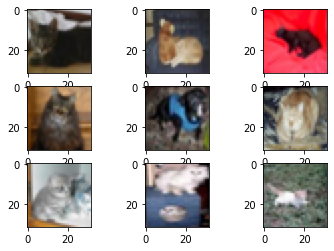

In [ ]:
#Look at the first 9 images from the dataset
images = range(0,9)
for i in images:
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
    
#Show the plot
plt.show()

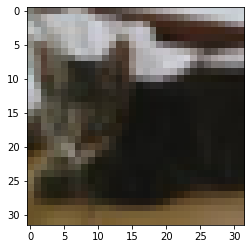

In [ ]:
#Image of Cat
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
#Its a 1st cat image label
y_train[0]

array([0])

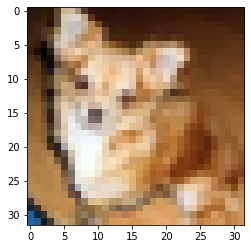

In [ ]:
#Image of 1st Dog
plt.imshow(x_train[7000], cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
#Its a 1st dog image label
y_train[7000]

array([1])

##Loading Dev and Test Set


In [ ]:
#code part 1 -Obtaining the Dataset
from bs4 import BeautifulSoup
import numpy as np
import requests
import cv2
import PIL.Image
import urllib

#-----------------------------------Cats--------------------------------------------------------------------
cat_page1 = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n02123159")# Tiger Cats synset
#print(ie_page.content)
cat_soup1 = BeautifulSoup(cat_page1.content, 'html.parser')#puts the content of the website into the soup variable, each url on a different line

cat_page2 = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n02124075")# Egyptian synset
#print(ae_page.content)
cat_soup2 = BeautifulSoup(cat_page2.content, 'html.parser')#puts the content of the website into the soup variable, each url on a different line
''''
cat_page3 = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n02123394")# Persian Cats synset
#print(cat_page3.content)
cat_soup3 = BeautifulSoup(cat_page3.content, 'html.parser')#puts the content of the website into the soup variable, each url on a different line

ae_page = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n02123045")# Tabby Cats  synset
print(ae_page.content)
ae_soup = BeautifulSoup(ae_page.content, 'html.parser')#puts the content of the website into the soup variable, each url on a different line

ie_page = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n02123597")# Siamese Cats synset
print(ie_page.content)
ie_soup = BeautifulSoup(ie_page.content, 'html.parser')#puts the content of the website into the soup variable, each url on a different line
'''

#----------------------------------Dogs--------------------------------------------------------------------------
dog_page1 = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n02110341")# Dalmation Dogs synset
#print(dog_page1.content)
dog_soup1 = BeautifulSoup(dog_page1.content, 'html.parser')#puts the content of the website into the soup variable, each url on a different line

dog_page2 = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n02109961")# Eskimo dog synset
#print(ae_page.content)
dog_soup2 = BeautifulSoup(dog_page2.content, 'html.parser')#puts the content of the website into the soup variable, each url on a different line

'''
dog_page3 = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n02106662")# German shepherd dog synset
#print(ie_page.content)
dog_soup3 = BeautifulSoup(dog_page3.content, 'html.parser')#puts the content of the website into the soup variable, each url on a different line

ae_page = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n02116738")# African hunting dog  synset
print(ae_page.content)
ae_soup = BeautifulSoup(ae_page.content, 'html.parser')#puts the content of the website into the soup variable, each url on a different line

ie_page = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n02111277")# Newfoundland dog synset
print(ie_page.content)
ie_soup = BeautifulSoup(ie_page.content, 'html.parser')#puts the content of the website into the soup variable, each url on a different line
'''

'\ndog_page3 = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n02106662")# German shepherd dog synset\n#print(ie_page.content)\ndog_soup3 = BeautifulSoup(dog_page3.content, \'html.parser\')#puts the content of the website into the soup variable, each url on a different line\n\nae_page = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n02116738")# African hunting dog  synset\nprint(ae_page.content)\nae_soup = BeautifulSoup(ae_page.content, \'html.parser\')#puts the content of the website into the soup variable, each url on a different line\n\nie_page = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n02111277")# Newfoundland dog synset\nprint(ie_page.content)\nie_soup = BeautifulSoup(ie_page.content, \'html.parser\')#puts the content of the website into the soup variable, each url on a different line\n'

In [ ]:
#code part 2- Using Beautiful Soup to get the correct Outcome

cat_str_soup1=str(cat_soup1)#convert soup to string so it can be split
type(cat_str_soup1)
cat_split_urls1=cat_str_soup1.split('\r\n')#split so each url is a different position on a list
print(len(cat_split_urls1))#print the length of the list so you know how many urls you have

cat_str_soup2=str(cat_soup2)#convert soup to string so it can be split
type(cat_str_soup2)
cat_split_urls2=cat_str_soup2.split('\r\n')#split so each url is a different position on a list
print(len(cat_split_urls2))

dog_str_soup1=str(dog_soup1)#convert soup to string so it can be split
type(dog_str_soup1)
dog_split_urls1=dog_str_soup1.split('\r\n')#split so each url is a different position on a list
print(len(dog_split_urls1))#print the length of the list so you know how many urls you have

dog_str_soup2=str(dog_soup2)#convert soup to string so it can be split
type(dog_str_soup2)
dog_split_urls2=dog_str_soup2.split('\r\n')#split so each url is a different position on a list
print(len(dog_split_urls2))#print the length of the list so you know how many urls you have

1421
978
1400
1541


In [ ]:
!mkdir /content/catdog_dev/ 
!mkdir /content/catdog_test/

In [ ]:
img_rows, img_cols = 32, 32 #number of rows and columns to convert the images to
input_shape = (img_rows, img_cols, 3)#format to store the images (rows, columns,channels) called channels last

def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urllib.request.urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	# return the image
	return image

In [ ]:
n_of_training_images=50   #The number of Development images to use
counter1=0
for progress in range(10*n_of_training_images):#store all 200 INDIAN ELEPHANT images on a directory
    if (counter1 == n_of_training_images):
      break
    if (progress%10==0):
        print(progress)
    if not cat_split_urls1[progress] == None:
      try:
        I = url_to_image(cat_split_urls1[progress])
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/catdog_dev/cat.'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)
          counter1=counter1+1
          print("Counter count :",counter1)
      except:
        None

counter2=0
for progress in range(10*n_of_training_images):#store all 200 INDIAN ELEPHANT images on a directory
    if (counter2 == n_of_training_images):
      break
    if (progress%10==0):
        print(progress)
    if not cat_split_urls2[progress] == None:
      try:
        I = url_to_image(cat_split_urls2[progress])
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/catdog_dev/cat.'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)
          counter2=counter2+1
          print("Counter count :",counter2)
      except:
        None

print("\n ALL THE DEV SET CATS- IMAGES STORED ON THE DIRECTORY\n")
print("Total Counter :" ,(counter1+counter2))

n_of_training_images=50   #The number of Development images to use
counter1=0
for progress in range(10*n_of_training_images):#store all 200 INDIAN ELEPHANT images on a directory
    if (counter1 == n_of_training_images):
      break
    if (progress%10==0):
        print(progress)
    if not dog_split_urls1[progress] == None:
      try:
        I = url_to_image(dog_split_urls1[progress])
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/catdog_dev/dog.'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)
          counter1=counter1+1
          print("Counter count :",counter1)
      except:
        None

counter2=0
for progress in range(10*n_of_training_images):#store all 200 INDIAN ELEPHANT images on a directory
    if (counter2 == n_of_training_images):
      break
    if (progress%10==0):
        print(progress)
    if not dog_split_urls2[progress] == None:
      try:
        I = url_to_image(dog_split_urls2[progress])
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/catdog_dev/dog.'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)
          counter2=counter2+1
          print("Counter count :",counter2)
      except:
        None

print("\n ALL THE DEV SET DOG- IMAGES STORED ON THE DIRECTORY\n")
print("Total Counter :" ,(counter1+counter2))

0
Counter count : 1
Counter count : 2
Counter count : 3
Counter count : 4
Counter count : 5
Counter count : 6
Counter count : 7
Counter count : 8
10
Counter count : 9
Counter count : 10
Counter count : 11
Counter count : 12
Counter count : 13
Counter count : 14
Counter count : 15
Counter count : 16
20
Counter count : 17
Counter count : 18
Counter count : 19
Counter count : 20
Counter count : 21
Counter count : 22
Counter count : 23
30
Counter count : 24
Counter count : 25
Counter count : 26
Counter count : 27
Counter count : 28
Counter count : 29
Counter count : 30
40
Counter count : 31
Counter count : 32
Counter count : 33
Counter count : 34
Counter count : 35
Counter count : 36
Counter count : 37
Counter count : 38
Counter count : 39
Counter count : 40
50
Counter count : 41
Counter count : 42
Counter count : 43
Counter count : 44
Counter count : 45
Counter count : 46
60
Counter count : 47
Counter count : 48
Counter count : 49
Counter count : 50
0
Counter count : 1
Counter count : 2
C

In [ ]:
n_of_training_images=50   #The number of Development images to use
counter1=0
for progress in range(10*n_of_training_images):  #store all 200 INDIAN ELEPHANT images on a directory
    if (counter1 == n_of_training_images):
      break
    if (progress%10==0):
        print(progress)
    if not cat_split_urls1[progress] == None:
      try:
        I = url_to_image(cat_split_urls1[progress])
        if (len(I.shape))==3:  #check if the image has width, length and channels
          save_path = '/content/catdog_test/cat.'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)
          counter1=counter1+1
          print("Counter count :",counter1)
      except:
        None

counter2=0
for progress in range(10*n_of_training_images):  #store all 200 INDIAN ELEPHANT images on a directory
    if (counter2 == n_of_training_images):
      break
    if (progress%10==0):
        print(progress)
    if not cat_split_urls2[progress] == None:
      try:
        I = url_to_image(cat_split_urls2[progress])
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/catdog_test/cat.'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)
          counter2=counter2+1
          print("Counter count :",counter2)
      except:
        None

print("\n ALL THE TEST SET CATS- IMAGES STORED ON THE DIRECTORY\n")
print("Total Counter :" ,(counter1+counter2))

n_of_training_images=50   #The number of Development images to use
counter1=0
for progress in range(10*n_of_training_images):#store all 200 INDIAN ELEPHANT images on a directory
    if (counter1 == n_of_training_images):
      break
    if (progress%10==0):
        print(progress)
    if not dog_split_urls1[progress] == None:
      try:
        I = url_to_image(dog_split_urls1[progress])
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/catdog_test/dog.'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)
          counter1=counter1+1
          print("Counter count :",counter1)
      except:
        None

counter2=0
for progress in range(10*n_of_training_images):#store all 200 INDIAN ELEPHANT images on a directory
    if (counter2 == n_of_training_images):
      break
    if (progress%10==0):
        print(progress)
    if not dog_split_urls2[progress] == None:
      try:
        I = url_to_image(dog_split_urls2[progress])
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/catdog_test/dog.'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)
          counter2=counter2+1
          print("Counter count :",counter2)
      except:
        None

print("\n ALL THE TEST SET DOG- IMAGES STORED ON THE DIRECTORY\n")
print("Total Counter :" ,(counter1+counter2))

0
Counter count : 1
Counter count : 2
Counter count : 3
Counter count : 4
Counter count : 5
Counter count : 6
Counter count : 7
Counter count : 8
10
Counter count : 9
Counter count : 10
Counter count : 11
Counter count : 12
Counter count : 13
Counter count : 14
Counter count : 15
Counter count : 16
20
Counter count : 17
Counter count : 18
Counter count : 19
Counter count : 20
Counter count : 21
Counter count : 22
Counter count : 23
30
Counter count : 24
Counter count : 25
Counter count : 26
Counter count : 27
Counter count : 28
Counter count : 29
Counter count : 30
40
Counter count : 31
Counter count : 32
Counter count : 33
Counter count : 34
Counter count : 35
Counter count : 36
Counter count : 37
Counter count : 38
Counter count : 39
Counter count : 40
50
Counter count : 41
Counter count : 42
Counter count : 43
Counter count : 44
Counter count : 45
Counter count : 46
60
Counter count : 47
Counter count : 48
Counter count : 49
Counter count : 50
0
Counter count : 1
Counter count : 2
C

###Save Dev images to folder

In [ ]:
# Path to the train folder
import os
original_dev = '/content/catdog_dev/'
 
filenames = os.listdir(original_dev)
categories = []
for filename in filenames:
  category = filename.split('.')[0]
  if category == 'cat':
    categories.append('0')
  else:
    categories.append('1')


#Create dataframe for Development

import pandas as pd
data = pd.DataFrame({'filename':filenames,'label':categories})
data.to_csv("original_catdog_dev.csv",index=False)

In [ ]:
data

,filename,label
0,cat.10.jpg,0
1,dog.64.jpg,1
2,cat.35.jpg,0
3,dog.58.jpg,1
4,dog.27.jpg,1
...,...,...
139,cat.73.jpg,0
140,dog.11.jpg,1
141,dog.40.jpg,1
142,cat.80.jpg,0


###Similarly for test

In [ ]:
# Path to the train folder
import os
original_test = '/content/catdog_test/'
 
filenames = os.listdir(original_test)
categories = []
for filename in filenames:
  category = filename.split('.')[0]
  if category == 'cat':
    categories.append(0)
  else:
    categories.append(1)

data_test = pd.DataFrame({'filename':filenames,'label':categories})
data_test.to_csv("original_catdog_test.csv",index=False)


In [ ]:
data_test

,filename,label
0,cat.10.jpg,0
1,dog.64.jpg,1
2,cat.35.jpg,0
3,dog.58.jpg,1
4,dog.27.jpg,1
...,...,...
139,cat.73.jpg,0
140,dog.11.jpg,1
141,dog.40.jpg,1
142,cat.80.jpg,0


In [ ]:
'''
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator()
datagen.fit(x_train)

dev_generator = datagen.flow_from_dataframe(dataframe=data, directory=original_dev,
                                             x_col='filename',
                                             y_col='label',
                                             target_size=(32,32),
                                             class_mode='binary',
                                             #batch_size=10,
                                             #subset='validation',
                                             #shuffle=True,
                                             #seed=7,
                                            color_mode='rgb')

test_datagen=ImageDataGenerator(rescale=1./255)

test_generator=test_datagen.flow_from_dataframe(dataframe=data_test,
                                                directory="/content/catdog_test/",
                                                x_col="filename",
                                                y_col=None,
                                                #batch_size=10,
                                                #seed=7,
                                                #shuffle=False,
                                                class_mode=None,
                                                target_size=(32,32),
                                                color_mode='rgb')
'''

'\nfrom keras.preprocessing.image import ImageDataGenerator\n\ndatagen = ImageDataGenerator()\ndatagen.fit(x_train)\n\ndev_generator = datagen.flow_from_dataframe(dataframe=data, directory=original_dev,\n                                             x_col=\'filename\',\n                                             y_col=\'label\',\n                                             target_size=(32,32),\n                                             class_mode=\'binary\',\n                                             #batch_size=10,\n                                             #subset=\'validation\',\n                                             #shuffle=True,\n                                             #seed=7,\n                                            color_mode=\'rgb\')\n\ntest_datagen=ImageDataGenerator(rescale=1./255)\n\ntest_generator=test_datagen.flow_from_dataframe(dataframe=data_test,\n                                                directory="/content/catdog_test/",\n           

###Model Building

In [ ]:
'''
from keras import models
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.layers import Activation, Flatten, Conv2D,MaxPooling2D
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
from keras import layers

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'valid',activation ='relu', input_shape=x_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.20))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'valid',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.15))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))

model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dense(1, activation = "sigmoid"))
model.summary()
'''

'\nfrom keras import models\nfrom keras.layers import Dense, Dropout\nfrom keras.models import Sequential\nfrom keras.layers import Activation, Flatten, Conv2D,MaxPooling2D\nfrom keras.utils.vis_utils import model_to_dot\nfrom IPython.display import SVG\nfrom keras import layers\n\nmodel = Sequential()\nmodel.add(Conv2D(filters = 32, kernel_size = (5,5),padding = \'valid\',activation =\'relu\', input_shape=x_train.shape[1:]))\nmodel.add(MaxPooling2D(pool_size=(2,2)))\nmodel.add(Dropout(0.20))\n\nmodel.add(Conv2D(filters = 64, kernel_size = (3,3),padding = \'valid\',activation =\'relu\'))\nmodel.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))\nmodel.add(Dropout(0.15))\n\nmodel.add(Flatten())\nmodel.add(Dense(1024))\nmodel.add(Activation(\'relu\'))\n\nmodel.add(Dense(512))\nmodel.add(Activation(\'relu\'))\n\nmodel.add(Dense(256))\nmodel.add(Activation(\'relu\'))\n\nmodel.add(Dense(1, activation = "sigmoid"))\nmodel.summary()\n'

In [ ]:
#Building the Sequential Model
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from keras import models
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.layers import Activation, Flatten, Conv2D,MaxPooling2D
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
from keras import layers

#We need to use a Conv2D layer at start of the neural network for Images
#the syntax is Conv2D(1, (image_width,image_height), padding="valid", activation="sigmoid", input_shape=X_train.shape[1:])
#the we add a flatten layer
model = Sequential()
# 1st Convolution
model.add(Conv2D(32 , (5 , 5) , padding = "same" ,  input_shape=x_train.shape[1:],activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2 , 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(64 , (5 , 5) , padding = "same",activation="relu"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2 , 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(128 , (5 , 5) , padding = "same",activation="relu"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2 , 2)))
model.add(Dropout(0.5))

# Flattening to run the model
model.add(Flatten())

model.add(Dense(1024,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(512,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.4))

#As it has 3 classes so last layer has 3 units
model.add(Dense(1 , activation="sigmoid"))

In [ ]:
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
filepath = "weights-improvement-experiment3.h5"
checkpoint = ModelCheckpoint(filepath, monitor = 'val_accuracy', verbose=1, save_best_only=True, mode='max')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30, min_delta=0.01, baseline=2.0)
red_lr= ReduceLROnPlateau(monitor='val_accuracy',patience=10,verbose=1,factor=0.1)
callbacks_list = [checkpoint, es,red_lr]

In [ ]:
model.compile(loss='binary_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])

###Using Flow from DataFrame Technique 

In [ ]:
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=5,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

datagen.fit(x_train)

dev_generator = datagen.flow_from_dataframe(dataframe=data, directory=original_dev,
                                             x_col='filename',
                                             y_col='label',
                                             target_size=(32,32),
                                             class_mode='binary',
                                             #batch_size=10,
                                             #subset='validation',
                                             #shuffle=True,
                                             #seed=7,
                                            color_mode='rgb')

test_datagen=ImageDataGenerator(rescale=1/255)

test_generator=test_datagen.flow_from_dataframe(dataframe=data_test,
                                                directory="/content/catdog_test/",
                                                x_col="filename",
                                                y_col=None,
                                                #batch_size=10,
                                                #seed=7,
                                                #shuffle=False,
                                                class_mode=None,
                                                target_size=(32,32),
                                                color_mode='rgb')

Found 144 validated image filenames belonging to 2 classes.
Found 144 validated image filenames.


In [ ]:
# fits the model on batches with real-time data augmentation:
history=model.fit(datagen.flow(x_train, y_train),epochs=100,verbose=1,callbacks=callbacks_list,validation_data=dev_generator)

Epoch 1/5
313/313 [==============================] - 15s 22ms/step - loss: 0.9738 - accuracy: 0.5236 - val_loss: 1222.9117 - val_accuracy: 0.5278

Epoch 00001: val_accuracy improved from -inf to 0.52778, saving model to weights-improvement-experiment3.h5
Epoch 2/5
313/313 [==============================] - 6s 20ms/step - loss: 0.7201 - accuracy: 0.5534 - val_loss: 814.3580 - val_accuracy: 0.5278

Epoch 00002: val_accuracy did not improve from 0.52778
Epoch 3/5
313/313 [==============================] - 6s 20ms/step - loss: 0.6772 - accuracy: 0.5970 - val_loss: 222.4556 - val_accuracy: 0.4792

Epoch 00003: val_accuracy did not improve from 0.52778
Epoch 4/5
313/313 [==============================] - 6s 21ms/step - loss: 0.6719 - accuracy: 0.5966 - val_loss: 131.5236 - val_accuracy: 0.5208

Epoch 00004: val_accuracy did not improve from 0.52778
Epoch 5/5
313/313 [==============================] - 6s 20ms/step - loss: 0.6447 - accuracy: 0.6344 - val_loss: 519.2340 - val_accuracy: 0.4722



Plot of accuracy of Train & Validation


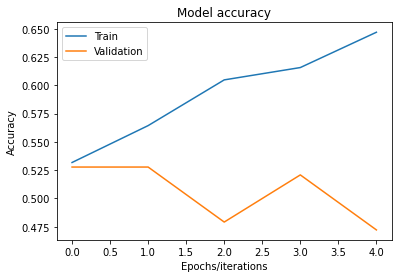

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs/iterations")
plt.legend(['Train','Validation'], loc="upper left")
plt.show()

Plot of Loss of Train & Validation


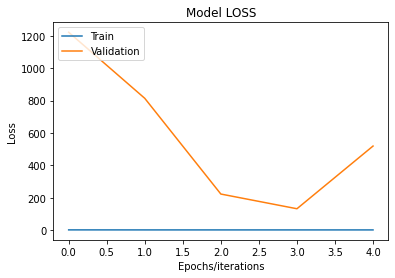

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model LOSS")
plt.ylabel("Loss")
plt.xlabel("Epochs/iterations")
plt.legend(['Train','Validation'], loc="upper left")
plt.show()

#Predict the output


In [ ]:
test_generator.reset()
predictions=np.argmax(model.predict_generator(test_generator),axis=-1)

filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,"Predictions":predictions})

results.to_csv("results_catsdogs_test.csv",index=False)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
results['Predictions']

0      0
1      0
2      0
3      0
4      0
      ..
139    0
140    0
141    0
142    0
143    0
Name: Predictions, Length: 144, dtype: int64

In [ ]:
data_test['label']

0      0
1      1
2      0
3      1
4      1
      ..
139    0
140    1
141    1
142    0
143    1
Name: label, Length: 144, dtype: int64

Confusion matrix

Text(0.5, 1.0, 'Confusion_matrix')

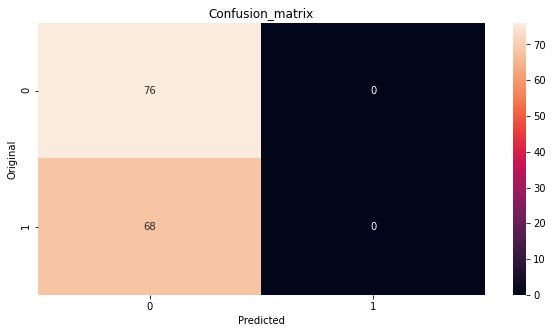

In [ ]:
plt.figure(figsize=(10,5))
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
cm = confusion_matrix(np.asarray(data_test['label']), results['Predictions'])
ax = plt.subplot()

import seaborn as sns
sns.heatmap(cm, annot = True, ax = ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Original')
ax.set_title('Confusion_matrix')

Classification report

In [ ]:
print(classification_report(np.asarray(data_test['label']), results["Predictions"]))

              precision    recall  f1-score   support

           0       0.53      1.00      0.69        76
           1       0.00      0.00      0.00        68

    accuracy                           0.53       144
   macro avg       0.26      0.50      0.35       144
weighted avg       0.28      0.53      0.36       144



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Getting the test accuracy by checking on labels


In [ ]:
score = accuracy_score(results['Predictions'],data_test["label"])
print('Test Accuracy:',score*100)

Test Accuracy: 52.77777777777778


#Deployment

In [ ]:
!pip install flask gevent requests pillow

     |████████████████████████████████| 5.5MB 8.0MB/s 
     |████████████████████████████████| 163kB 54.4MB/s 
     |████████████████████████████████| 245kB 56.5MB/s 


Creat a file ProcFile

In [ ]:
procfile = 'web: gunicorn app:app'
procfiles= open("/content/Procfile","w")
procfiles.write(procfile)
procfiles.close()

#Install flask and ngrok

In [ ]:
!pip install flask-ngrok
from flask_ngrok import run_with_ngrok
from flask import Flask

#Webpage

In [ ]:
a = '''
<!doctype html>
<html lang="en">
<head>
<title>Cat & Dogs Recognition</title>
</head> 
  <body>
 
          <h3>Cat & Dog Recognition Server</h3><br/>
       
      <form action="" method="post" enctype=multipart/form-data>
        <input type=file name="catdog"><br/>
        
        <p>cat = 0<br/>
        dog = 1</p><br/>
        <p>Enter Animal number in text box</p><br/>
        <input type=text name="catdog_name">

        <input type=submit value=Upload>
    </form>
    {{label}}  
     
  </body>
  </html>
  '''

In [ ]:
!mkdir '/content/templates'
!mkdir '/content/uploads'
!mkdir '/content/uploads/cat'
!mkdir '/content/uploads/dog'


Html_file = open("/content/templates/index.html", "w")
Html_file.write(a)
Html_file.close()

#Deploy model

In [ ]:
import os
from flask import Flask, render_template, request
from keras.preprocessing import image
from keras.preprocessing.image import load_img, img_to_array
import tensorflow as tf

app = Flask(__name__)
run_with_ngrok(app)
app.config['UPLOADS'] = 'uploads'


def load_mymodel():
    global mymodel
    mymodel = keras.models.load_model('/content/weights-improvement-experiment3.h5')
    #final_model = tf.keras.Sequential([mymodel,tf.keras.layers.Softmax()])
    

@app.route('/')
def home():
    return render_template('index.html')

def predictions(file):
    img = image.load_img(file, target_size=(32,32), color_mode="rgb")
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    ans = mymodel.predict_classes(img)
    return ans


@app.route('/', methods=['POST'])
def upload_files():
    file = request.files['catdog']
    animallabels = request.form['catdog_name']
    print(type(animallabels))
    if int(animallabels) == 0:
      animallabels = 'cat'
      filepath = os.path.join(app.config['UPLOADS'], animallabels, file.filename)
      file.save(filepath)
    else:
      animallabels = 'dog'
      filepath = os.path.join(app.config['UPLOADS'], animallabels, file.filename)
      file.save(filepath)

    output = predictions(filepath)

    if output.astype('int32') == 0:
      output = 'cat'
    else:
      output = 'dog'

    return render_template('index.html', label=output)

if __name__=='__main__':
    load_mymodel()
    app.run()

##Screenshot of the Deployment of the Flask App

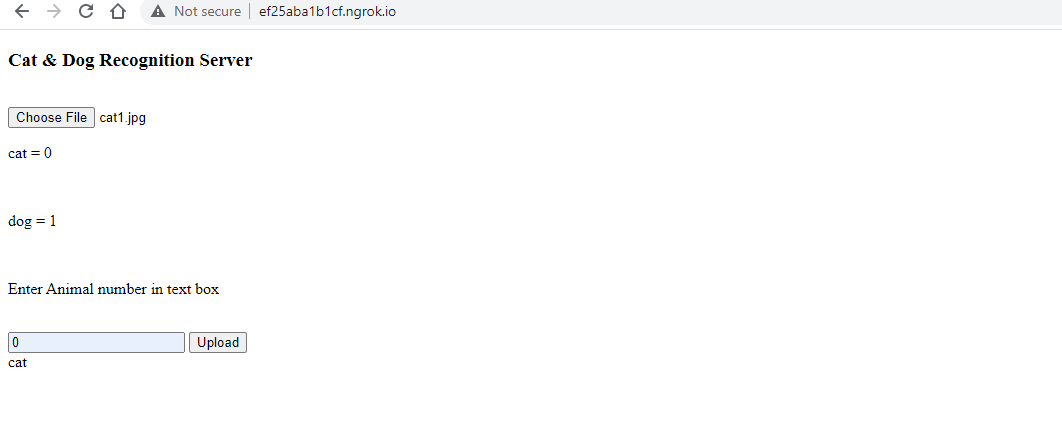

### Now collected data can be used to retrain model - Create new versions of model & Analyze again performance of these versions - accuracy, error



---

---

---







In [ ]:
'''
#Augmenting Train Data & Again storing in Same Data
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
datagen = ImageDataGenerator(rescale=1/255,
                             rotation_range=90, 
                             vertical_flip=True, 
                             width_shift_range=0.2, 
                             height_shift_range=0.2, 
                             fill_mode='nearest', 
                             zoom_range=0.1, 
                             brightness_range=[0.9,0.5])

datagen.fit(x_train)


import os
os.makedirs('images_folder')

for x,y in datagen.flow(x_train, y_train, batch_size=9, save_to_dir='images_folder', save_prefix='aug', save_format='.png'):
  pass
'''